In [1]:
import matplotlib.pyplot as plt
from scipy.special import erfc
import matplotlib as mpl
import numpy as np
from matplotlib.patches import Ellipse

In [2]:
# Define custom colors
new_red = '#FF6384'      # Reddish-pink, coral-like
new_blue = '#36A2EB'     # Vibrant medium blue
new_teal = '#4BC0C0'     # Cyan-green teal
new_green = '#2ECC71'    # Bright emerald green
new_purple = '#9B59B6'   # Vibrant purple
new_orange = '#E67E22'   # Warm orange


In [3]:
EBN0_DB_MIN = 0.0
EBN0_DB_MAX = 20.0
EBN0_DB_TRAIN = 12.0

In [4]:
def Q_func(x):
    return 0.5 * erfc(x / np.sqrt(2))

#Theoretical Line
def theo_ber_M_qam(eb_no_db, M):
  assert isinstance(M, int)
  assert M > 0
  eb_no = 10**(eb_no_db / 10)
  
  if M %4==0:
    d_min = 6*np.log2(M)/ (M-1)
    BER = 1/np.log2(M) *4*(1- 1/np.sqrt(M)) * Q_func(np.sqrt( (d_min/2) *eb_no))
  return BER

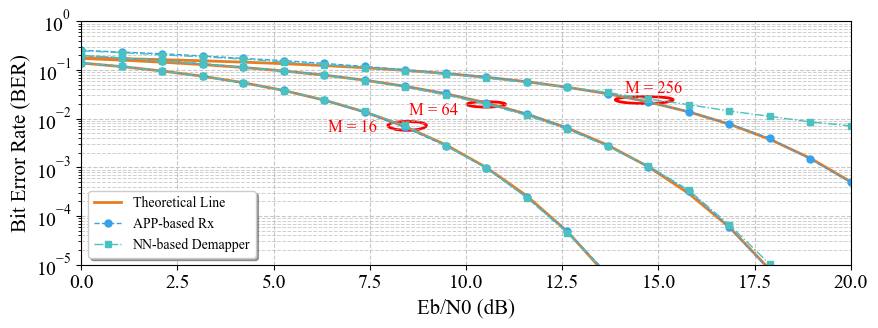

In [17]:
# Font settings
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['font.size'] = 14

# Sample Eb/N0 range and theoretical BERs
eb_no_db_range = np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20)
ber_16_theo = theo_ber_M_qam(eb_no_db_range, 16)
ber_64_theo = theo_ber_M_qam(eb_no_db_range, 64)
ber_256_theo = theo_ber_M_qam(eb_no_db_range, 256)

ber_baseline_16 = np.loadtxt("ber_baseline_16.csv", delimiter = ',')
ber_baseline_64 = np.loadtxt("ber_baseline_64.csv", delimiter = ',')
ber_baseline_256 = np.loadtxt("ber_baseline_256.csv", delimiter = ',')

ber_DNN_16 = np.loadtxt("ber_DNN_16.csv", delimiter = ',')
ber_DNN_64 = np.loadtxt("ber_DNN_64.csv", delimiter = ',')
ber_DNN_256 = np.loadtxt("ber_DNN_256.csv", delimiter = ',')

# # Create figure
plt.figure(figsize=(9, 3.5))

# Theoretical curves
plt.semilogy(eb_no_db_range, ber_16_theo,color = new_orange, linestyle = '-', linewidth=2, label='Theoretical Line')
plt.semilogy(eb_no_db_range, ber_64_theo,color = new_orange, linestyle = '-', linewidth=2)
plt.semilogy(eb_no_db_range, ber_256_theo, color = new_orange, linestyle = '-', linewidth=2)

# Baseline LLR-based results
plt.semilogy(eb_no_db_range, ber_baseline_16,color= new_blue, linestyle ='--',marker ='o' , markersize=5, linewidth=1, label='APP-based Rx ')
plt.semilogy(eb_no_db_range, ber_baseline_64, color = new_blue, linestyle ='--',marker = 'o', markersize=5, linewidth=1)
plt.semilogy(eb_no_db_range, ber_baseline_256, color = new_blue, linestyle ='--',marker = 'o', markersize=5, linewidth=1)

# DNN-based results
plt.semilogy(eb_no_db_range, ber_DNN_16, color =new_teal, linestyle = '-.',marker ='s', markersize=5, linewidth=1, label='NN-based Demapper')
plt.semilogy(eb_no_db_range, ber_DNN_64, color = new_teal, linestyle = '-.', marker ='s', markersize=5, linewidth=1)
plt.semilogy(eb_no_db_range, ber_DNN_256, color = new_teal, linestyle =  '-.', marker = 's', markersize=5, linewidth=1)


annotation_index_1 = 8
ellipse_1 = Ellipse(xy=(eb_no_db_range[annotation_index_1]+0.05, ber_DNN_16[annotation_index_1]),
                    width= 1., height=0.003,
                    facecolor='none', edgecolor='red', linewidth=2)
plt.gca().add_patch(ellipse_1)
plt.annotate('M = 16', 
             xy=(eb_no_db_range[annotation_index_1], ber_DNN_16[annotation_index_1]), 
             xytext=(eb_no_db_range[annotation_index_1]-2 , ber_DNN_16[annotation_index_1]-0.002),
             fontsize=12, color='red')


annotation_index_2 =  10
ellipse_2 = Ellipse(xy=(eb_no_db_range[annotation_index_2], ber_DNN_64[annotation_index_2]),
                    width=1, height=0.005,
                    facecolor='none', edgecolor='red', linewidth=2)
plt.gca().add_patch(ellipse_2)
plt.annotate('M = 64', 
             xy=(eb_no_db_range[annotation_index_2], ber_DNN_64[annotation_index_2]), 
             xytext=(eb_no_db_range[annotation_index_2]-2 , ber_DNN_64[annotation_index_2]-0.008),
             fontsize=12, color='red')

annotation_index_3 = 12
ellipse_3 = Ellipse(xy=(eb_no_db_range[annotation_index_3]+2, ber_DNN_256[annotation_index_3]-0.02),
                    width = 1.5, height = 0.008,
                    facecolor='none', edgecolor='red', linewidth=2)
plt.gca().add_patch(ellipse_3)
plt.annotate('M = 256', 
             xy=(eb_no_db_range[annotation_index_3], ber_DNN_256[annotation_index_3]), 
             xytext=(eb_no_db_range[annotation_index_3]+1.5 , ber_DNN_256[annotation_index_3]-0.01),
             fontsize=12, color='red')


# Labels, grid, and title
plt.xlabel('Eb/N0 (dB)', fontsize=15)
plt.ylabel('Bit Error Rate (BER)', fontsize=15)
# plt.title('BER Performance of QAM Systems in AWGN Channel', fontsize=20, pad=15)

# Grid and axis formatting
plt.grid(True, which='both', linestyle='--', linewidth=0.8, alpha=0.7)
plt.ylim(1e-5, 1)
plt.xlim(0, 20)

# Legend styling
plt.legend(loc='lower left', fontsize=10, frameon=True, shadow=True, fancybox=True)

# Ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Tight layout
plt.tight_layout()
plt.grid(True, which='minor', linestyle='--', linewidth=0.7, alpha=0.6)


# Show the plot
plt.show()